In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import obspy.geodetics.flinnengdahl as flinnengdahl
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [3]:
def myround(x, base=5):
    return base * round(x/base)

In [4]:
fe = flinnengdahl.FlinnEngdahl()

In [5]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined.csv')

In [6]:
def get_stf(scardec_name, wanted_type = 'fctopt'):
    db = combined[combined['scardec_name']==scardec_name]

    time = []
    momentrate = []

    event = os.listdir(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}')
    starts = [n for n, l in enumerate(event) if l.startswith(wanted_type)]
    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    lines = lines[2:]
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        time.append(float(split[0]))
        momentrate.append(float(split[1]))

    momentrate = np.array(momentrate)
    return momentrate, time, db

In [7]:
def get_mag(scardec_name):
    db = combined[combined['scardec_name']==scardec_name]
    mag = db['scardec_magnitude'].values[0]
    return mag

def get_date(scardec_name):
    db = combined[combined['scardec_name']==scardec_name]
    year = db['year'].values[0]
    month = db['month'].values[0]
    day = db['day'].values[0]
    return year, month, day

In [8]:
def get_strike_dip_rake(scardec_name, wanted_type = 'fctopt'):
    event = os.listdir(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}')
    starts = [n for n, l in enumerate(event) if l.startswith(wanted_type)]
    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    line = lines[1]

    split = line.split(' ')
    split = [s for s in split if s not in ['', ' ', '\n']]

    strike1 = float(split[3])
    dip1 = float(split[4])
    rake1 = float(split[5])

    strike2 = float(split[6])
    dip2 = float(split[7])
    rake2 = float(split[8])

    return strike1, dip1, rake1, strike2, dip2, rake2

In [ ]:
def convert_fe_subdivisions_to_regions(subdivision):
    final_values = [17, 29, 46, 52, 71, 83, 101, 142, 146, 157, 168, 179, 182, 189,
                    195, 208, 210, 216, 230, 241, 247, 260, 272, 293, 301, 319, 325,
                    334, 356, 375, 401, 414, 437, 527, 531, 549, 587, 610, 632, 655,
                    666, 682, 692, 699, 702, 708, 712, 720, 726, 729]

    if subdivision < 730:
        for index, max_value in enumerate(final_values):
            if subdivision <= max_value:
                return index+1
    else:
        if subdivision == 730:
            return 5
        elif subdivision == 731:
            return 7
        elif subdivision == 732:
            return 10
        elif subdivision in [733, 734, 735, 736, 737]:
            return 25
        elif subdivision in [738, 739]:
            return 32
        elif subdivision in [740, 741, 742]:
            return 33
        elif subdivision in [743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755]:
            return 37
        elif subdivision == 756:
            return 43
        elif subdivision == 757:
            return 44
        else:
            return None


In [10]:
results_db = pd.DataFrame(columns = ['scardec_name', 'magnitude', 'year', 'month', 'day', 'latitude', 'longitude', 'depth', 'strike1', 'dip1', 'rake1', 'strike2', 'dip2', 'rake2', 'FE', 'region'])

for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec'):
    #print(scardec_name)
    db = combined[combined['scardec_name']==scardec_name]

    fe_region = fe.get_number(db['longitude'].values[0], db['latitude'].values[0])

    region = convert_fe_subdivisions_to_regions(fe_region)
    list_for_database = [scardec_name, get_mag(scardec_name), *get_date(scardec_name), db['latitude'].values[0], db['longitude'].values[0], db['depth'].values[0], *get_strike_dip_rake(scardec_name), fe_region, region]
    results_db.loc[len(results_db)] = list_for_database


In [11]:
results_db

,scardec_name,magnitude,year,month,day,latitude,longitude,depth,strike1,dip1,rake1,strike2,dip2,rake2,FE,region
0,FCTs_20170818_025925_NORTH_OF_ASCENSION_ISLAND,6.591,2017,8,18,-1.112,-13.660,17.0,348.0,83.0,8.0,257.0,82.0,173.0,407,32
1,FCTs_20110126_154229_NORTHERN_SUMATRA__INDONESIA,6.128,2011,1,26,2.200,96.830,25.0,327.0,14.0,104.0,132.0,77.0,87.0,706,46
2,FCTs_19981010_162908_MINAHASSA_PENINSULA__SULA...,5.927,1998,10,10,-0.384,119.859,17.0,3.0,23.0,49.0,227.0,73.0,106.0,265,23
3,FCTs_19920730_082446_XIZANG,6.017,1992,7,30,29.580,90.160,13.0,22.0,41.0,-72.0,179.0,52.0,-105.0,306,26
4,FCTs_19960327_205206_NEAR_COAST_OF_NICARAGUA,6.157,1996,3,27,11.777,-87.935,8.0,127.0,43.0,-99.0,319.0,48.0,-81.0,74,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,FCTs_20030725_221329_NEAR_EAST_COAST_OF_HONSHU...,6.039,2003,7,25,38.420,141.000,6.0,192.0,42.0,111.0,345.0,51.0,72.0,228,19
4085,FCTs_20080429_052604_HOKKAIDO__JAPAN_REGION,5.760,2008,4,29,41.452,142.030,49.0,184.0,28.0,73.0,23.0,64.0,99.0,224,19
4086,FCTs_20210927_061721_CRETE__GREECE,5.904,2021,9,27,35.244,25.270,7.0,32.0,37.0,-103.0,228.0,54.0,-80.0,370,30
4087,FCTs_20160105_022111_SOUTHEAST_OF_SHIKOKU__JAPAN,5.954,2016,1,5,30.613,132.734,6.0,47.0,52.0,-31.0,157.0,66.0,-138.0,237,20


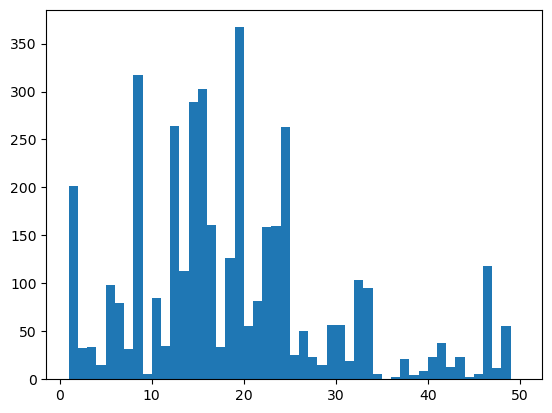

In [40]:
plt.hist(results_db['region'], np.arange(1, 51, 1))
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/grouping_events/region_distribution.png')

In [35]:
regions_with_sz = [1,2,4,5,6,8,9,17,19,20,21,22,46,24,16,15,23, 11, 7, 18, 14, 12]
subduction_zones = results_db[results_db['region'].isin(regions_with_sz)]

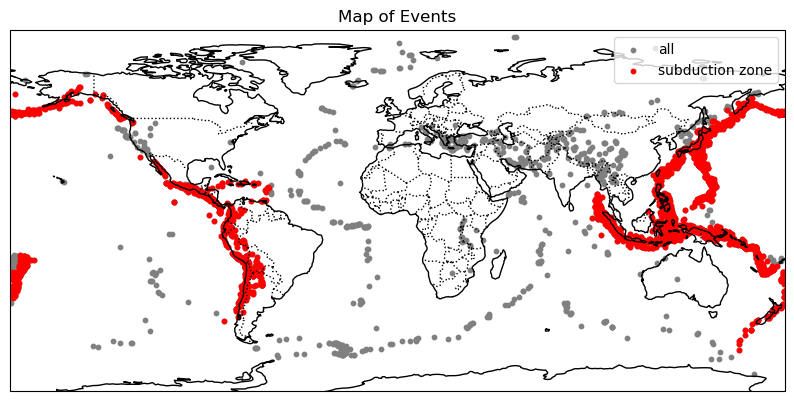

<Figure size 640x480 with 0 Axes>

In [39]:
# Create a new figure
fig = plt.figure(figsize=(10, 5))

# Create a GeoAxes in the tile's projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the events
sc = ax.scatter(results_db['longitude'], results_db['latitude'], c='grey', s=10, transform=ccrs.PlateCarree(), label = 'all')
sc1 = ax.scatter(subduction_zones['longitude'], subduction_zones['latitude'], c='red', s=10, transform=ccrs.PlateCarree(), label = 'subduction zone')

# Add a colorbar
# cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='Region')

# Set the title
ax.set_title('Map of Events')
plt.legend()

# Show the plot
plt.show()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/grouping_events/map_colored_sz_or_not.png')

In [37]:
subduction_zones

,scardec_name,magnitude,year,month,day,latitude,longitude,depth,strike1,dip1,rake1,strike2,dip2,rake2,FE,region
1,FCTs_20110126_154229_NORTHERN_SUMATRA__INDONESIA,6.128,2011,1,26,2.200,96.830,25.0,327.0,14.0,104.0,132.0,77.0,87.0,706,46
2,FCTs_19981010_162908_MINAHASSA_PENINSULA__SULA...,5.927,1998,10,10,-0.384,119.859,17.0,3.0,23.0,49.0,227.0,73.0,106.0,265,23
4,FCTs_19960327_205206_NEAR_COAST_OF_NICARAGUA,6.157,1996,3,27,11.777,-87.935,8.0,127.0,43.0,-99.0,319.0,48.0,-81.0,74,6
5,FCTs_20011012_150216_SOUTH_OF_MARIANA_ISLANDS,6.935,2001,10,12,12.690,144.980,37.0,149.0,30.0,53.0,10.0,67.0,109.0,210,17
6,FCTs_19960212_090807_SOUTH_OF_SUMBAWA__INDONESIA,6.193,1996,2,12,-11.040,118.670,7.0,69.0,39.0,-100.0,261.0,52.0,-82.0,291,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,FCTs_19950814_043717_NEW_BRITAIN_REGION__P.N.G,6.775,1995,8,14,-4.840,151.510,135.0,249.0,25.0,123.0,33.0,70.0,76.0,192,15
4083,FCTs_20080423_182841_TAIWAN_REGION,6.095,2008,4,23,22.881,121.619,20.0,249.0,72.0,-166.0,155.0,77.0,-18.0,243,21
4084,FCTs_20030725_221329_NEAR_EAST_COAST_OF_HONSHU...,6.039,2003,7,25,38.420,141.000,6.0,192.0,42.0,111.0,345.0,51.0,72.0,228,19
4085,FCTs_20080429_052604_HOKKAIDO__JAPAN_REGION,5.760,2008,4,29,41.452,142.030,49.0,184.0,28.0,73.0,23.0,64.0,99.0,224,19


In [38]:
len(subduction_zones)/len(results_db)

0.7820983125458547